# STOCK MARKET PREDICTION

## IMPORTING THE LIBRARIES
- **numpy** for numerical operations
- **pandas** data manipulation and analysis
- **yfinance** for downloading stock data
- **matplotlib.pyplot** for plotting graphs

In [52]:
import numpy as np
import pandas as pd

# Import YFinance Library
import yfinance as yf

# Download Stock Prices for Training and Testing from YFinance

## 1) Download Stock Data for Training (train_df)

In [53]:
# Download Stock Prices

# Ticker and start date, end date for Training 
stock_symbol = 'ICICIBANK.NS'
train_start_date = '2024-02-09'
train_end_date = '2024-03-01'

# Download Stock Price Data from Yahoo Finance
train_df = yf.download(stock_symbol, start=train_start_date, end=train_end_date, progress=False)
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-09,988.849976,1013.750000,985.500000,1010.700012,1010.700012,12799837
2024-02-12,1010.400024,1012.200012,985.250000,996.099976,996.099976,8050066
2024-02-13,1006.000000,1027.050049,1000.299988,1019.799988,1019.799988,18706292
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395
2024-02-19,1023.349976,1046.000000,1023.349976,1043.750000,1043.750000,9388255
2024-02-20,1041.050049,1052.650024,1033.250000,1048.750000,1048.750000,11293528
2024-02-21,1056.800049,1064.000000,1048.000000,1051.949951,1051.949951,15946325


## 2) Downloading Stock Data for Testing (test_df)

In [54]:
# Download Stock Data from Predicting

# Ticker and start date, end date for Predicting 
test_start_date = '2024-03-01'
test_end_date = '2024-03-16'

# Download Stock Price Data from Yahoo Finance
test_df = yf.download(stock_symbol, start=test_start_date, end=test_end_date, progress=False)
print(test_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-01  1055.000000  1089.949951  1054.000000  1086.900024  1086.900024   
2024-03-04  1081.000000  1095.000000  1080.099976  1092.349976  1092.349976   
2024-03-05  1086.199951  1099.500000  1076.500000  1088.050049  1088.050049   
2024-03-06  1080.300049  1113.550049  1080.300049  1097.099976  1097.099976   
2024-03-07  1094.949951  1095.000000  1082.699951  1087.949951  1087.949951   
2024-03-11  1087.949951  1087.949951  1076.750000  1078.699951  1078.699951   
2024-03-12  1077.050049  1094.800049  1055.650024  1076.849976  1076.849976   
2024-03-13  1077.150024  1089.650024  1073.150024  1083.949951  1083.949951   
2024-03-14  1080.000000  1097.099976  1075.050049  1083.599976  1083.599976   
2024-03-15  1072.000000  1086.250000  1070.000000  1080.349976  1080.349976   

              Volume  
Date                  
2024-

## Extracting Working Days for which we want to predict the stock prices

In [55]:
# Extract dates to predict
prediction_dates = test_df.index
print(prediction_dates)

DatetimeIndex(['2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Date', freq=None)


## Extracting Close Prices from Training Data

In [56]:
# Extract Close Price from Training data
prices_to_train = train_df[['Close', 'Open', 'Low', 'High']].to_numpy()
print(prices_to_train)

[[1010.70001221  988.84997559  985.5        1013.75      ]
 [ 996.09997559 1010.40002441  985.25       1012.20001221]
 [1019.79998779 1006.         1000.29998779 1027.05004883]
 [1022.70001221 1009.54998779 1007.54998779 1035.69995117]
 [1016.65002441 1022.84997559 1006.59997559 1026.65002441]
 [1023.25       1023.20001221 1016.90002441 1026.19995117]
 [1043.75       1023.34997559 1023.34997559 1046.        ]
 [1048.75       1041.05004883 1033.25       1052.65002441]
 [1051.94995117 1056.80004883 1048.         1064.        ]
 [1062.69995117 1056.         1040.30004883 1066.        ]
 [1061.30004883 1070.         1057.65002441 1070.        ]
 [1054.19995117 1053.09997559 1050.5        1062.30004883]
 [1060.19995117 1050.75       1046.5        1066.19995117]
 [1046.19995117 1063.         1042.15002441 1064.84997559]
 [1052.19995117 1043.05004883 1038.5        1060.69995117]]


In [57]:
from sklearn.feature_selection import f_regression

# Calculate SMA
sma = train_df['Close'].rolling(window=5, min_periods=1).mean()
# Convert Series to numpy array and reshape
sma_array = sma.to_numpy().reshape(-1, 1)

# Calculate EMA
ema = train_df['Close'].ewm(span=5, adjust=False).mean()
ema_array = ema.to_numpy().reshape(-1, 1)

# Calculate DEMA
dema = 2 * ema - ema.ewm(span=5, adjust=False).mean()
dema_array = dema.to_numpy().reshape(-1, 1)

# Calculate APO for 1 week input for predicting the next day's price (short-term)
ema5 = train_df['Close'].ewm(span=5, adjust=False).mean()
ema10 = train_df['Close'].ewm(span=10, adjust=False).mean()

apo = ema5 - ema10
apo = apo.to_numpy().reshape(-1, 1)

bop = (train_df['Close'] - train_df['Open']) / (train_df['High'] - train_df['Low'])
bop = bop.to_numpy().reshape(-1, 1)

# Calculate MOM
mom = train_df['Close'] - train_df['Close'].shift(5)
# Fill NaN values in MOM using FFill and BFill
mom = mom.ffill().bfill()
mom = mom.to_numpy().reshape(-1, 1)

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for a 1-week period (5 trading days)
rsi = calculate_rsi(train_df, window=5)
# Fill NaN values in MOM using FFill and BFill
rsi = rsi.ffill().bfill()
rsi = rsi.to_numpy().reshape(-1, 1)

# Calculate AD values
ad = (2 * train_df['Close'] - train_df['High'] - train_df['Low']) / (train_df['High'] - train_df['Low']) * train_df['Volume']
ad_array = ad.to_numpy().reshape(-1, 1)

# Calculate OBV values
obv = (train_df['Volume'] * (train_df['Close'] - train_df['Close'].shift(1) > 0) * 2 - 1).cumsum()
obv_array = obv.to_numpy().reshape(-1, 1)

# Calculate TRANGE values
trange = train_df['High'] - train_df['Low']
trange_array = trange.to_numpy().reshape(-1, 1)

# Calculate ATR values
period = 5
atr = trange.rolling(window=period, min_periods=1).mean()
atr_array = atr.to_numpy().reshape(-1, 1)

# Calculate NATR values
natr = atr / train_df['Close'] * 100
natr_array = natr.to_numpy().reshape(-1, 1)

# Add values as a column at the end of the numpy array
prices_to_train = np.hstack((prices_to_train, sma_array, ema_array, dema_array, apo, bop, mom, rsi, ad_array, obv_array, trange_array, atr_array, natr_array))

print(prices_to_train)

[[ 1.01070001e+03  9.88849976e+02  9.85500000e+02  1.01375000e+03
   1.01070001e+03  1.01070001e+03  1.01070001e+03  0.00000000e+00
   7.73452624e-01  1.25499878e+01  5.62963011e+01  1.00359895e+07
  -1.00000000e+00  2.82500000e+01  2.82500000e+01  2.79509248e+00]
 [ 9.96099976e+02  1.01040002e+03  9.85250000e+02  1.01220001e+03
   1.00339999e+03  1.00583333e+03  1.00258888e+03 -2.21212676e+00
  -5.30613816e-01  1.25499878e+01  5.62963011e+01 -1.56821220e+06
  -2.00000000e+00  2.69500122e+01  2.76000061e+01  2.77080682e+00]
 [ 1.01979999e+03  1.00600000e+03  1.00029999e+03  1.02705005e+03
   1.00886666e+03  1.01048888e+03  1.01142962e+03  3.06237871e-01
   5.15886217e-01  1.25499878e+01  5.62963011e+01  8.56637056e+06
   3.74125810e+07  2.67500610e+01  2.73166911e+01  2.67863222e+00]
 [ 1.02270001e+03  1.00954999e+03  1.00754999e+03  1.03569995e+03
   1.01232500e+03  1.01455926e+03  1.01790000e+03  2.10072907e+00
   4.67141795e-01  1.25499878e+01  5.62963011e+01  1.36557107e+06
   7.31

In [58]:
# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(prices_to_train, columns=['Open','High','Low','Close','SMA','EMA','DEMA','APO','BOP', 'MOM', 'RSI', 'AD', 'OBV', 'TRANGE', 'ATR', 'NATR'])
df['AD'] = df['AD'].apply(lambda x: '{:.6f}'.format(x))
df.index = train_df.index
# Display the DataFrame
print(df)


                   Open         High          Low        Close          SMA  \
Date                                                                          
2024-02-09  1010.700012   988.849976   985.500000  1013.750000  1010.700012   
2024-02-12   996.099976  1010.400024   985.250000  1012.200012  1003.399994   
2024-02-13  1019.799988  1006.000000  1000.299988  1027.050049  1008.866659   
2024-02-14  1022.700012  1009.549988  1007.549988  1035.699951  1012.324997   
2024-02-15  1016.650024  1022.849976  1006.599976  1026.650024  1013.190002   
2024-02-16  1023.250000  1023.200012  1016.900024  1026.199951  1015.700000   
2024-02-19  1043.750000  1023.349976  1023.349976  1046.000000  1025.230005   
2024-02-20  1048.750000  1041.050049  1033.250000  1052.650024  1031.020007   
2024-02-21  1051.949951  1056.800049  1048.000000  1064.000000  1036.869995   
2024-02-22  1062.699951  1056.000000  1040.300049  1066.000000  1046.079980   
2024-02-23  1061.300049  1070.000000  1057.650024  1

In [59]:
# Calculate SMA
test_df['SMA'] = test_df['Close'].rolling(window=5, min_periods=1).mean()

# Calculate EMA
test_df['EMA'] = test_df['Close'].ewm(span=5, adjust=False).mean()

# Calculate DEMA
test_df['DEMA'] = 2 * test_df['EMA'] - test_df['EMA'].ewm(span=5, adjust=False).mean()

# Calculate APO for 1 week input for predicting the next day's price (short-term)
ema5 = test_df['Close'].ewm(span=5, adjust=False).mean()
ema10 = test_df['Close'].ewm(span=10, adjust=False).mean()

test_df['APO'] = ema5 - ema10
test_df['BOP'] = (test_df['Close'] - test_df['Open']) / (test_df['High'] - test_df['Low'])

# Calculate MOM
test_df['MOM'] = test_df['Close'] - test_df['Close'].shift(5)
# Fill NaN values in MOM using FFill and BFill
test_df['MOM'] = test_df['MOM'].ffill().bfill()

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for a 1-week period (5 trading days)
test_df['RSI'] = calculate_rsi(test_df, window=5)
# Fill NaN values in MOM using FFill and BFill
test_df['RSI'] = test_df['RSI'].ffill().bfill()

# Calculate AD values
test_df['AD'] = (2 * test_df['Close'] - test_df['High'] - test_df['Low']) / (test_df['High'] - test_df['Low']) * test_df['Volume']

# Calculate OBV values
test_df['OBV'] = (test_df['Volume'] * (test_df['Close'] - test_df['Close'].shift(1) > 0) * 2 - 1).cumsum()

# Calculate TRANGE values
test_df['TRANGE'] = test_df['High'] - test_df['Low']

# Calculate ATR values
period = 5
test_df['ATR'] = test_df['TRANGE'].rolling(window=period, min_periods=1).mean()

# Calculate NATR values
test_df['NATR'] = test_df['ATR'] / test_df['Close'] * 100

# Print the updated DataFrame with TRANGE, ATR, and NATR features
print(test_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-01  1055.000000  1089.949951  1054.000000  1086.900024  1086.900024   
2024-03-04  1081.000000  1095.000000  1080.099976  1092.349976  1092.349976   
2024-03-05  1086.199951  1099.500000  1076.500000  1088.050049  1088.050049   
2024-03-06  1080.300049  1113.550049  1080.300049  1097.099976  1097.099976   
2024-03-07  1094.949951  1095.000000  1082.699951  1087.949951  1087.949951   
2024-03-11  1087.949951  1087.949951  1076.750000  1078.699951  1078.699951   
2024-03-12  1077.050049  1094.800049  1055.650024  1076.849976  1076.849976   
2024-03-13  1077.150024  1089.650024  1073.150024  1083.949951  1083.949951   
2024-03-14  1080.000000  1097.099976  1075.050049  1083.599976  1083.599976   
2024-03-15  1072.000000  1086.250000  1070.000000  1080.349976  1080.349976   

              Volume          SMA          EMA     

## Import Library for Ridge regression model from scikit-learn

In [60]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Initialize an empty dictionary to store predicted prices " predicted_price = {} " ##

In [61]:
rr_predicted_price = {}
svr_predicted_price = {}
knn_predicted_price = {}
dt_predicted_price = {}
rf_predicted_price = {}
ann_predicted_price = {}

# Loop through each date in the "prediction_dates" then train the model and make prediction of next day's closing price and then include this prediction in feature data and remove the oldest one and again trained the model -  #

## 1) Prepare 'features' (every 10 days' closing prices) and 'targets' (next day's closing price) for training the Ridge regression model:

- **features = []** - List to store the features (every 10 days' closing prices)
- **targets = []** - List to store the targets (next day's closing price)
- **for i in range(len(prices_to_train)-10):** - Loop through the training data
- **features.append(prices_to_train.values[i:i+10])** - # Add every 10 days' closing prices to features
- **targets.append(prices_to_train.iloc[i+10])** - # Add the next day's closing price to targets

## 2) Train the Ridge regression model with an alpha value
- **model = Ridge(alpha=10)** -  Create a Ridge regression model with alpha (regularization strength) set to higher values
- **model.fit(features, targets)** - Train the model on the features and targets

## 3) Make predictions for the next day's closing price:
- **last_sequence = features[-1]** -  Get the last 10 days' closing prices
- **last_sequence = last_sequence[1:]** - Remove the first element
- **
last_sequence = np.append(last_sequence, targets[-1]** -  Add the last actual price to the sequenc
- **
predict = model.predict(last_sequence.reshape(1, -1** - # Predict the next day's pri
- **e
predicted_price[date] = predict[** -  # Store the predicted price for the current d

## 4) Update the prices_to_train for the next iteration:
- **prices_to_train = prices_to_train[1:]** - Remove the first element from the training data
- **prices_to_train[date] = predict[-1]** - Add the predicted price to the training data for the next iterationnate

In [62]:
for date in prediction_dates:
    
    train_features = prices_to_train[:-1]
    train_targets = prices_to_train[1:, :4]
    
    print(f"================ Date :  {date} ========================")
    print(f"\n=============== Training Dataset : ===================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(prices_to_train)
    print(f"\n============================================ Features & Targets =====================================================")
    print()
    print("----------------------Features--------------------------- | -----------------------Targets------------------------------")
    for feature, target in zip(train_features, train_targets):
        print(f"{feature} | {target}")
    
    model_rr = Ridge(alpha=10)
    model_rr.fit(train_features, train_targets)

    model_svr = MultiOutputRegressor(SVR(kernel='rbf', C=1e3))
    model_svr.fit(train_features, train_targets)

    model_knn = KNeighborsRegressor(n_neighbors=5)
    model_knn.fit(train_features, train_targets)

    model_dt = DecisionTreeRegressor()
    model_dt.fit(train_features, train_targets)
    
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(train_features, train_targets)

    model_ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
    model_ann.fit(train_features, train_targets)
    
    target_to_predict = prices_to_train[-1]
    
    rr_predict = model_rr.predict(target_to_predict.reshape(1, -1))
    rr_predicted_price[date] = rr_predict[-1]

    svr_predict = model_svr.predict(target_to_predict.reshape(1, -1))
    svr_predicted_price[date] = svr_predict[-1]

    knn_predict = model_knn.predict(target_to_predict.reshape(1, -1))
    knn_predicted_price[date] = knn_predict[-1]

    dt_predict = model_dt.predict(target_to_predict.reshape(1, -1))
    dt_predicted_price[date] = dt_predict[-1]

    rf_predict = model_rf.predict(target_to_predict.reshape(1, -1))
    rf_predicted_price[date] = rf_predict[-1]

    ann_predict = model_ann.predict(target_to_predict.reshape(1, -1))
    ann_predicted_price[date] = ann_predict[-1]
    
    print()
    print("================ Features for Prediction : ==================")
    print(target_to_predict)
    print()

    print("================ Predicted Prices : ========================")
    print(rr_predict)
    print()

    prices_to_train = prices_to_train[1:]
    specific_date_row = test_df.loc[test_df.index == date, ['Close', 'Open', 'Low', 'High', 'SMA', 'EMA', 'DEMA', 'APO', 'BOP', 'MOM', 'RSI', 'AD', 'OBV', 'TRANGE', 'ATR', 'NATR']].to_numpy()
    # Add the specific_date_row to prices_to_train
    prices_to_train = np.append(prices_to_train, specific_date_row, axis=0)
    

================ Date :  2024-03-01 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[ 1.01070001e+03  9.88849976e+02  9.85500000e+02  1.01375000e+03
   1.01070001e+03  1.01070001e+03  1.01070001e+03  0.00000000e+00
   7.73452624e-01  1.25499878e+01  5.62963011e+01  1.00359895e+07
  -1.00000000e+00  2.82500000e+01  2.82500000e+01  2.79509248e+00]
 [ 9.96099976e+02  1.01040002e+03  9.85250000e+02  1.01220001e+03
   1.00339999e+03  1.00583333e+03  1.00258888e+03 -2.21212676e+00
  -5.30613816e-01  1.25499878e+01  5.62963011e+01 -1.56821220e+06
  -2.00000000e+00  2.69500122e+01  2.76000061e+01  2.77080682e+00]
 [ 1.01979999e+03  1.00600000e+03  1.00029999e+03  1.02705005e+03
   1.00886666e+03  1.01048888e+03  1.01142962e+03  3.06237871e-01
   5.15886217e-01  1.25499878e+01  5.62963011e+01  8.56637056e+06
   3.74125810e+07  2.67500610e+01  2.73166911e+01  2.67863222e+00]
 [ 1.02270001e+03  

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=5.85288e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)



================ Features for Prediction : ==================
[ 1.05219995e+03  1.04305005e+03  1.03850000e+03  1.06069995e+03
  1.05481997e+03  1.05223322e+03  1.05397223e+03  4.89251345e+00
  4.12158670e-01 -1.05000000e+01  3.47826087e+01  4.90596422e+06
  2.50661795e+08  2.21999512e+01  1.77499756e+01  1.68693940e+00]

================ Predicted Prices : ========================
[[1047.19693974 1055.28679184 1037.71312505 1055.51499172]]

================ Date :  2024-03-04 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[ 9.96099976e+02  1.01040002e+03  9.85250000e+02  1.01220001e+03
   1.00339999e+03  1.00583333e+03  1.00258888e+03 -2.21212676e+00
  -5.30613816e-01  1.25499878e+01  5.62963011e+01 -1.56821220e+06
  -2.00000000e+00  2.69500122e+01  2.76000061e+01  2.77080682e+00]
 [ 1.01979999e+03  1.00600000e+03  1.00029999e+03  1.02705005e+03
   1.00886666e+03  1.01048888e+03  1

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=5.11617e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=4.5442e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)



================ Features for Prediction : ==================
[ 1.09234998e+03  1.08100000e+03  1.08009998e+03  1.09500000e+03
  1.08962500e+03  1.08871667e+03  1.08992778e+03  8.25750178e-01
  7.61742080e-01 -8.20007324e+00  5.18782347e+01  7.36077309e+06
  2.28491600e+07  1.49000244e+01  2.54249878e+01  2.32754963e+00]

================ Predicted Prices : ========================
[[1157.37141714 1076.68152368 1109.43409013 1145.85614819]]

================ Date :  2024-03-06 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[ 1.02270001e+03  1.00954999e+03  1.00754999e+03  1.03569995e+03
   1.01232500e+03  1.01455926e+03  1.01790000e+03  2.10072907e+00
   4.67141795e-01  1.25499878e+01  5.62963011e+01  1.36557107e+06
   7.31700200e+07  2.81499634e+01  2.75250092e+01  2.69140597e+00]
 [ 1.01665002e+03  1.02284998e+03  1.00659998e+03  1.02665002e+03
   1.01319000e+03  1.01525618e+03  1

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=4.16922e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=4.3477e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)



================ Features for Prediction : ==================
[ 1.09709998e+03  1.08030005e+03  1.08030005e+03  1.11355005e+03
  1.09110001e+03  1.09136297e+03  1.09371481e+03  1.77400040e+00
  5.05260955e-01 -8.20007324e+00  5.18782347e+01  2.29340648e+05
  6.64421260e+07  3.32500000e+01  2.67749939e+01  2.44052452e+00]

================ Predicted Prices : ========================
[[1110.17234467 1095.38882076 1083.3506507  1120.65883612]]

================ Date :  2024-03-11 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[ 1.02325000e+03  1.02320001e+03  1.01690002e+03  1.02619995e+03
   1.01570000e+03  1.01792079e+03  1.02149171e+03  2.87664334e+00
   5.37507383e-03  1.25499878e+01  6.16527198e+01  2.61745263e+06
   8.74888080e+07  9.29992676e+00  2.22400024e+01  2.17346713e+00]
 [ 1.04375000e+03  1.02334998e+03  1.02334998e+03  1.04600000e+03
   1.02523000e+03  1.02653053e+03  1

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=4.03732e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=3.78019e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)



================ Features for Prediction : ==================
[ 1.07869995e+03  1.08794995e+03  1.07675000e+03  1.08794995e+03
  1.08882998e+03  1.08638351e+03  1.08436196e+03 -9.81811893e-01
 -8.25896458e-01 -8.20007324e+00  3.89783455e+01 -8.67559965e+06
  6.64421240e+07  1.11999512e+01  1.89300049e+01  1.75489068e+00]

================ Predicted Prices : ========================
[[1093.85238465 1064.55868363 1063.70706018 1098.53997105]]

================ Date :  2024-03-13 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[ 1.04875000e+03  1.04105005e+03  1.03325000e+03  1.05265002e+03
   1.03102001e+03  1.03393702e+03  1.04428830e+03  8.49424238e+00
   3.96904200e-01  2.89500122e+01  8.52619011e+01  6.75280846e+06
   1.28852372e+08  1.94000244e+01  1.99099976e+01  1.89845030e+00]
 [ 1.05194995e+03  1.05680005e+03  1.04800000e+03  1.06400000e+03
   1.03687000e+03  1.03994133e+03  1

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=3.96514e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=3.93669e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)



================ Features for Prediction : ==================
[ 1.08394995e+03  1.07715002e+03  1.07315002e+03  1.08965002e+03
  1.08490996e+03  1.08345376e+03  1.08130831e+03 -1.72631956e+00
  4.12116773e-01 -4.10009766e+00  4.43679826e+01  7.68250279e+06
  1.16153862e+08  1.65000000e+01  2.24800049e+01  2.07389694e+00]

================ Predicted Prices : ========================
[[1093.23479117 1083.75987058 1074.3103616  1105.09756914]]

================ Date :  2024-03-15 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[ 1.06269995e+03  1.05600000e+03  1.04030005e+03  1.06600000e+03
   1.04607998e+03  1.04752754e+03  1.05985416e+03  1.13675130e+01
   2.60698984e-01  4.60499268e+01  1.00000000e+02  9.98290522e+06
   1.87610166e+08  2.56999512e+01  1.86099854e+01  1.75119848e+00]
 [ 1.06130005e+03  1.07000000e+03  1.05765002e+03  1.07000000e+03
   1.05368999e+03  1.05211837e+03  1

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=5.12605e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


In [63]:
# Create a DataFrame from the predicted prices dictionary
rr_predicted_prices = pd.DataFrame(rr_predicted_price.values(), index=rr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
svr_predicted_prices = pd.DataFrame(svr_predicted_price.values(), index=svr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(svr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
knn_predicted_prices = pd.DataFrame(knn_predicted_price.values(), index=knn_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(knn_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
dt_predicted_prices = pd.DataFrame(dt_predicted_price.values(), index=dt_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(dt_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
rf_predicted_prices = pd.DataFrame(rf_predicted_price.values(), index=rf_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rf_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
ann_predicted_prices = pd.DataFrame(ann_predicted_price.values(), index=ann_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(ann_predicted_prices)

            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01      1047.196940      1055.286792    1037.713125     1055.514992
2024-03-04       923.236651       971.166495     998.547999     1005.216911
2024-03-05      1157.371417      1076.681524    1109.434090     1145.856148
2024-03-06      1080.400880      1082.380321    1068.309987     1090.635178
2024-03-07      1110.172345      1095.388821    1083.350651     1120.658836
2024-03-11      1095.023633      1076.600293    1076.664019     1104.801980
2024-03-12      1093.852385      1064.558684    1063.707060     1098.539971
2024-03-13      1086.454291      1077.687357    1066.752206     1102.634013
2024-03-14      1093.234791      1083.759871    1074.310362     1105.097569
2024-03-15      1106.979711      1082.615481    1075.298163     1109.845438
            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01      1028.821071      1032.398651    1018.274324     1053.250318
2024-03-04  

## Prepare the actual prices DataFrame
- **actual_prices = test_df['Close']** - Get the actual closing prices for the test data

In [64]:
# Actual Prices
actual_prices = test_df[['Close', 'Open', 'Low', 'High']]
print(actual_prices)    

                  Close         Open          Low         High
Date                                                          
2024-03-01  1086.900024  1055.000000  1054.000000  1089.949951
2024-03-04  1092.349976  1081.000000  1080.099976  1095.000000
2024-03-05  1088.050049  1086.199951  1076.500000  1099.500000
2024-03-06  1097.099976  1080.300049  1080.300049  1113.550049
2024-03-07  1087.949951  1094.949951  1082.699951  1095.000000
2024-03-11  1078.699951  1087.949951  1076.750000  1087.949951
2024-03-12  1076.849976  1077.050049  1055.650024  1094.800049
2024-03-13  1083.949951  1077.150024  1073.150024  1089.650024
2024-03-14  1083.599976  1080.000000  1075.050049  1097.099976
2024-03-15  1080.349976  1072.000000  1070.000000  1086.250000


## Combine the actual and predicted prices DataFrames ##
- **result_df = pd.concat([actual_prices, predicted_prices], axis=1)** - Combine actual and predicted prices into a single DataFrame
- **result_df.columns = ['Actual', 'Predicted']** - Rename the columns for clarityrity

In [65]:
# Combine actual_prices and predicted_prices DataFrames
result_df = pd.concat([actual_prices, rr_predicted_prices, svr_predicted_prices, knn_predicted_prices, dt_predicted_prices, rf_predicted_prices, ann_predicted_prices], axis=1)
result_df.columns = ['Actual Close', 'Actual Open', 'Actual Low', 'Actual High', 'RR Predicted Close', 'RR Predicted Open', 'RR Predicted Low', 'RR Predicted High', 'SVR Predicted Close', 'SVR Predicted Open', 'SVR Predicted Low', 'SVR Predicted High', 'KNN Predicted Close', 'KNN Predicted Open', 'KNN Predicted Low', 'KNN Predicted High', 'DT Predicted Close', 'DT Predicted Open', 'DT Predicted Low', 'DT Predicted High', 'RF Predicted Close', 'RF Predicted Open', 'RF Predicted Low', 'RF Predicted High', 'ANN Predicted Close', 'ANN Predicted Open', 'ANN Predicted Low', 'ANN Predicted High']
print(result_df)

            Actual Close  Actual Open   Actual Low  Actual High  \
2024-03-01   1086.900024  1055.000000  1054.000000  1089.949951   
2024-03-04   1092.349976  1081.000000  1080.099976  1095.000000   
2024-03-05   1088.050049  1086.199951  1076.500000  1099.500000   
2024-03-06   1097.099976  1080.300049  1080.300049  1113.550049   
2024-03-07   1087.949951  1094.949951  1082.699951  1095.000000   
2024-03-11   1078.699951  1087.949951  1076.750000  1087.949951   
2024-03-12   1076.849976  1077.050049  1055.650024  1094.800049   
2024-03-13   1083.949951  1077.150024  1073.150024  1089.650024   
2024-03-14   1083.599976  1080.000000  1075.050049  1097.099976   
2024-03-15   1080.349976  1072.000000  1070.000000  1086.250000   

            RR Predicted Close  RR Predicted Open  RR Predicted Low  \
2024-03-01         1047.196940        1055.286792       1037.713125   
2024-03-04          923.236651         971.166495        998.547999   
2024-03-05         1157.371417        1076.681524

In [66]:
print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual Open', 'RR Predicted Open', 'SVR Predicted Open', 'KNN Predicted Open', 'DT Predicted Open', 'RF Predicted Open', 'ANN Predicted Open'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Open'], row['RR Predicted Open'], row['SVR Predicted Open'], row['KNN Predicted Open'], row['DT Predicted Open'], row['RF Predicted Open'], row['ANN Predicted Open']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual High', 'RR Predicted High', 'SVR Predicted High', 'KNN Predicted High', 'DT Predicted High', 'RF Predicted High', 'ANN Predicted High'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual High'], row['RR Predicted High'], row['SVR Predicted High'], row['KNN Predicted High'], row['DT Predicted High'], row['RF Predicted High'], row['ANN Predicted High']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}".format('Actual Low', 'RR Predicted Low', 'SVR Predicted Low', 'KNN Predicted Low', 'DT Predicted Low', 'RF Predicted Low', 'ANN Predicted Low'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Low'], row['RR Predicted Low'], row['SVR Predicted Low'], row['KNN Predicted Low'], row['DT Predicted Low'], row['RF Predicted Low'], row['ANN Predicted Low']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15} |  {:<15} |  {:<15} |  {:<15} |  {:<15}  | {:<15}".format('Actual Close', 'RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Close'], row['RR Predicted Close'], row['SVR Predicted Close'], row['KNN Predicted Close'], row['DT Predicted Close'], row['RF Predicted Close'], row['ANN Predicted Close']))

Actual Open       |  RR Predicted Open  |  SVR Predicted Open  |  KNN Predicted Open  |  DT Predicted Open  |  RF Predicted Open  |  ANN Predicted Open
1055.00000000     |   1055.28679184     |   1032.39865110      |    1055.98000488     |   1043.05004883     |   1050.35702087     |   5108990.07671090
1081.00000000     |   971.16649477      |   1004.52196247      |    1016.98999023     |   1055.00000000     |   1041.99950562     |   708762.01671457
1086.19995117     |   1076.68152368     |   1048.43660426      |    1031.98999023     |   1081.00000000     |   1066.60250000     |   -76702.76471074
1080.30004883     |   1082.38032139     |   1046.91499833      |    1047.31998291     |   1081.00000000     |   1074.20297791     |   14070.18706063 
1094.94995117     |   1095.38882076     |   1039.50455795      |    1050.82000732     |   1080.30004883     |   1080.93649414     |   -1863838.83313374
1087.94995117     |   1076.60029286     |   1064.69324162      |    1065.16999512     |   1080.

## Plot the actual and predicted prices
- **plt.figure(figsize=(12, 6))** - Set the size of the plot
- **plt.plot(result_df.index, result_df['Actual'], marker='o', label='Actual', color='blue')** - Plot actual prices
- **plt.plot(result_df.index, result_df['Predicted'], marker='o', label='Predicted', color='red')** - Plot predicted prices
- **plt.xlabel('Date')** - Set the label for the x-axis
- **plt.ylabel('Stock Price')** - Set the label for the y-axis
- **plt.title('Actual vs Predicted Stock Prices')** - Set the title of the plot
- **plt.legend()** - Show the legend
- **plt.xticks(rotation=45)** - Rotate x-axis labels for better visibility- **plt.grid(True)** - Add gridlines to the plot
- **plt.show()** - Display the plot


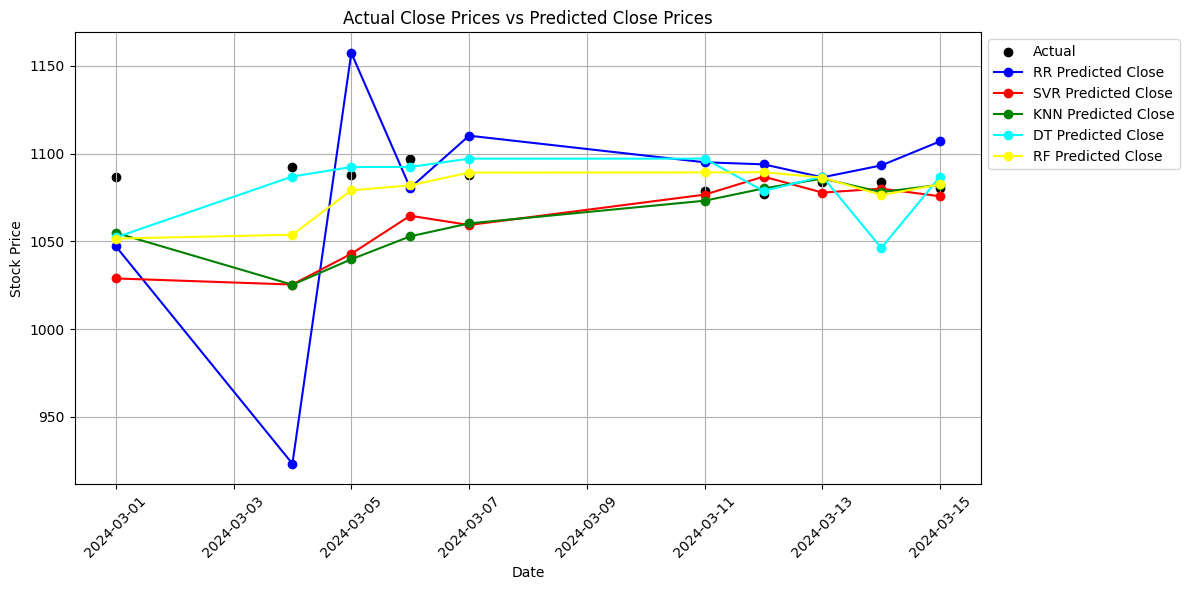

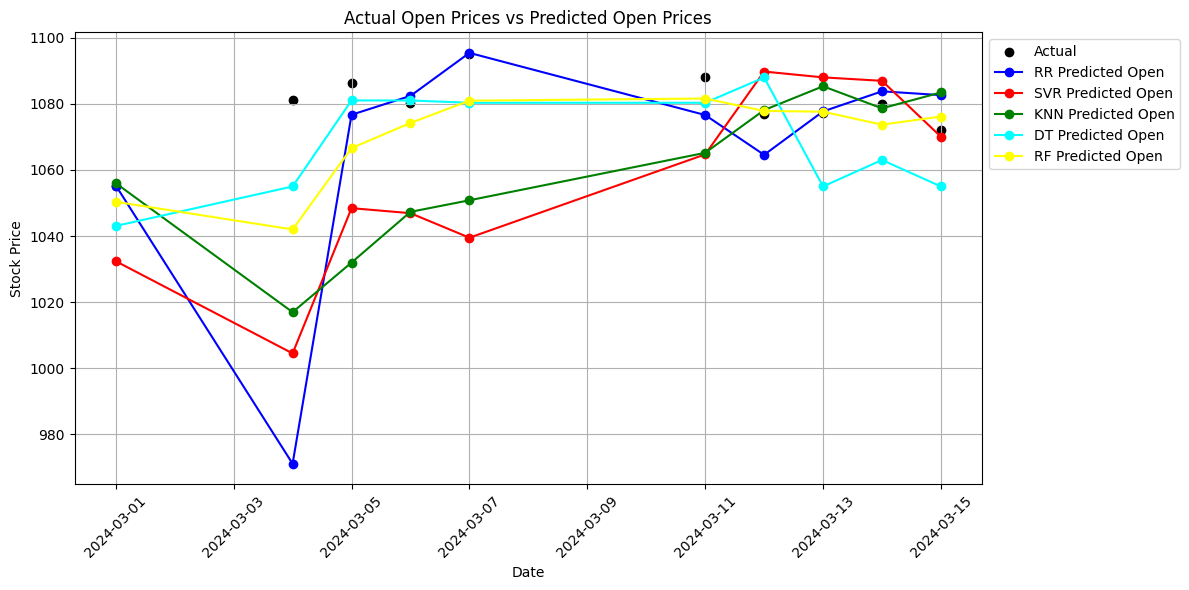

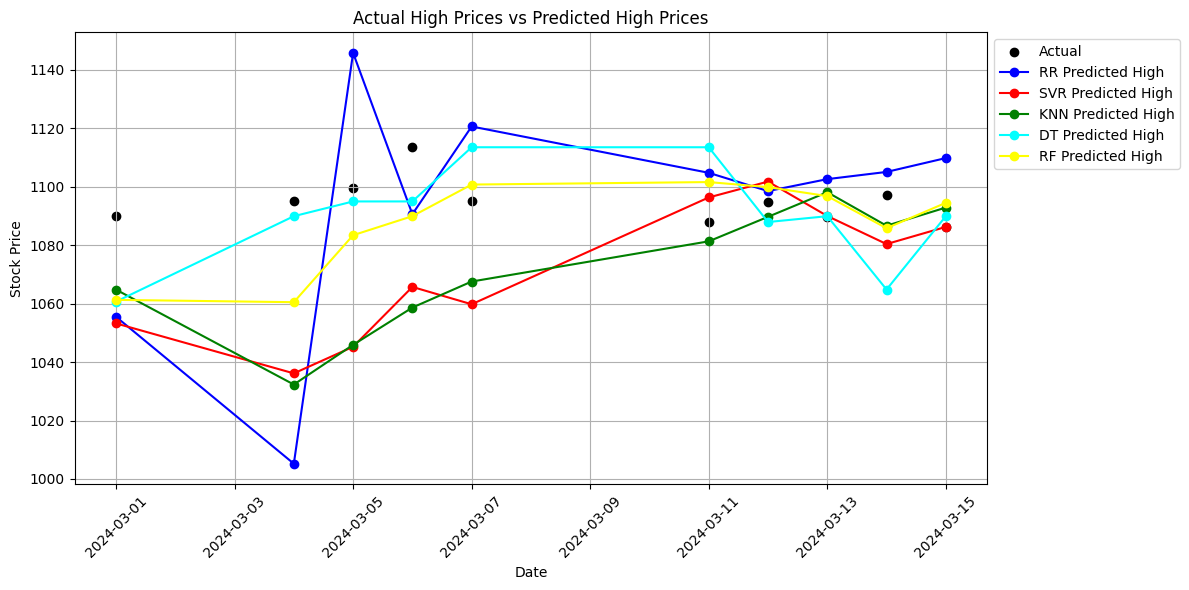

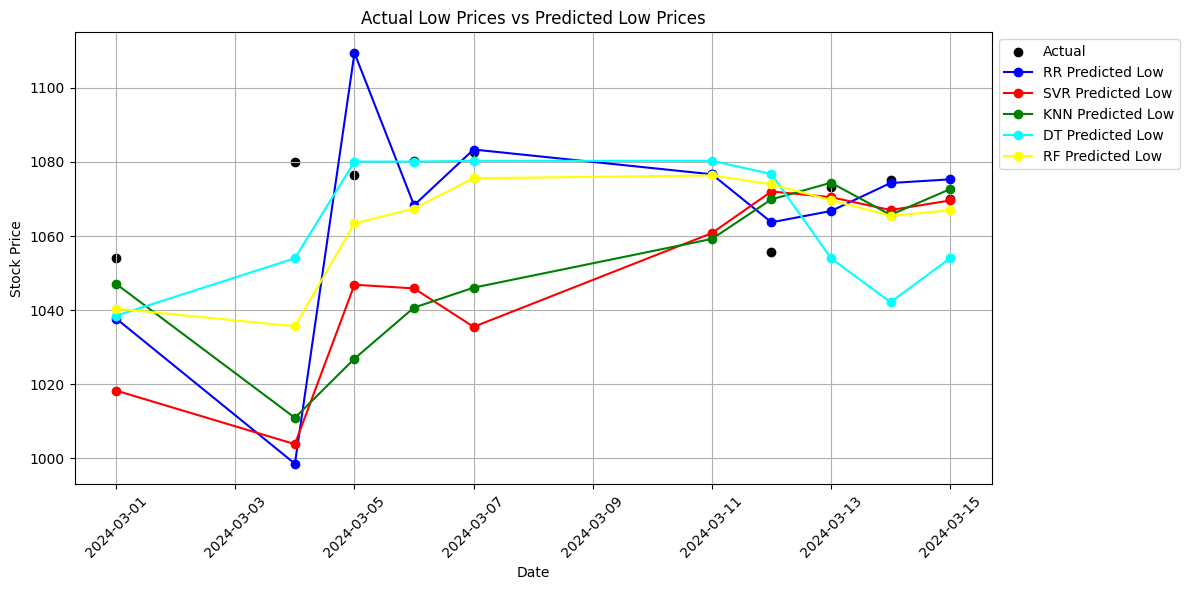

In [67]:
import matplotlib.pyplot as plt

# Plot actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Close'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Close'], marker='o', label='RR Predicted Close', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Close'], marker='o', label='SVR Predicted Close', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Close'], marker='o', label='KNN Predicted Close', color='green')
plt.plot(result_df.index, result_df['DT Predicted Close'], marker='o', label='DT Predicted Close', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Close'], marker='o', label='RF Predicted Close', color='yellow')
# plt.plot(result_df.index, result_df['ANN Predicted Close'], marker='o', label='ANN Predicted Close', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close Prices vs Predicted Close Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted open prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Open'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Open'], marker='o', label='RR Predicted Open', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Open'], marker='o', label='SVR Predicted Open', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Open'], marker='o', label='KNN Predicted Open', color='green')
plt.plot(result_df.index, result_df['DT Predicted Open'], marker='o', label='DT Predicted Open', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Open'], marker='o', label='RF Predicted Open', color='yellow')
# plt.plot(result_df.index, result_df['ANN Predicted Open'], marker='o', label='ANN Predicted Open', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Open Prices vs Predicted Open Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted high prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual High'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted High'], marker='o', label='RR Predicted High', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted High'], marker='o', label='SVR Predicted High', color='red')
plt.plot(result_df.index, result_df['KNN Predicted High'], marker='o', label='KNN Predicted High', color='green')
plt.plot(result_df.index, result_df['DT Predicted High'], marker='o', label='DT Predicted High', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted High'], marker='o', label='RF Predicted High', color='yellow')
# plt.plot(result_df.index, result_df['ANN Predicted High'], marker='o', label='ANN Predicted High', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual High Prices vs Predicted High Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted low prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Low'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Low'], marker='o', label='RR Predicted Low', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Low'], marker='o', label='SVR Predicted Low', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Low'], marker='o', label='KNN Predicted Low', color='green')
plt.plot(result_df.index, result_df['DT Predicted Low'], marker='o', label='DT Predicted Low', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Low'], marker='o', label='RF Predicted Low', color='yellow')
# plt.plot(result_df.index, result_df['ANN Predicted Low'], marker='o', label='ANN Predicted Low', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Low Prices vs Predicted Low Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
import pandas as pd

# Assuming result_df is your DataFrame with the predicted prices
# Convert the index to a DateTimeIndex
result_df.index = pd.to_datetime(result_df.index)

# Convert the DateTimeIndex to the desired date format
result_df.index = result_df.index.strftime('%Y-%m-%d')

# Create DataFrames with the actual and predicted prices
data_close = {
    'Actual Close': result_df['Actual Close'],
    'RR Predicted Close': result_df['RR Predicted Close'],
    'SVR Predicted Close': result_df['SVR Predicted Close'],
    'KNN Predicted Close': result_df['KNN Predicted Close'],
    'DT Predicted Close': result_df['DT Predicted Close'],
    'RF Predicted Close': result_df['RF Predicted Close'],
    'ANN Predicted Close': result_df['ANN Predicted Close']
}
df_close = pd.DataFrame(data_close)

data_open = {
    'Actual Open': result_df['Actual Open'],
    'RR Predicted Open': result_df['RR Predicted Open'],
    'SVR Predicted Open': result_df['SVR Predicted Open'],
    'KNN Predicted Open': result_df['KNN Predicted Open'],
    'DT Predicted Open': result_df['DT Predicted Open'],
    'RF Predicted Open': result_df['RF Predicted Open'],
    'ANN Predicted Open': result_df['ANN Predicted Open']
}
df_open = pd.DataFrame(data_open)

data_high = {
    'Actual High': result_df['Actual High'],
    'RR Predicted High': result_df['RR Predicted High'],
    'SVR Predicted High': result_df['SVR Predicted High'],
    'KNN Predicted High': result_df['KNN Predicted High'],
    'DT Predicted High': result_df['DT Predicted High'],
    'RF Predicted High': result_df['RF Predicted High'],
    'ANN Predicted High': result_df['ANN Predicted High']
}
df_high = pd.DataFrame(data_high)

data_low = {
    'Actual Low': result_df['Actual Low'],
    'RR Predicted Low': result_df['RR Predicted Low'],
    'SVR Predicted Low': result_df['SVR Predicted Low'],
    'KNN Predicted Low': result_df['KNN Predicted Low'],
    'DT Predicted Low': result_df['DT Predicted Low'],
    'RF Predicted Low': result_df['RF Predicted Low'],
    'ANN Predicted Low': result_df['ANN Predicted Low']
}
df_low = pd.DataFrame(data_low)

# Save the DataFrames to an Excel file
with pd.ExcelWriter('predicted_prices.xlsx') as writer:
    df_close.to_excel(writer, sheet_name='Close Prices')
    df_open.to_excel(writer, sheet_name='Open Prices')
    df_high.to_excel(writer, sheet_name='High Prices')
    df_low.to_excel(writer, sheet_name='Low Prices')
